<a href="https://colab.research.google.com/github/matthew-sessions/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [180]:
# TODO - your code!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2019-08-20 22:43:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-08-20 22:43:47 (611 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [181]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

--2019-08-20 22:43:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6868 (6.7K) [application/x-httpd-php]
Saving to: ‘house-votes-84.names.1’

house-votes-84.name 100%[===================>]   6.71K  --.-KB/s    in 0s      

2019-08-20 22:43:48 (115 MB/s) - ‘house-votes-84.names.1’ saved [6868/6868]



In [182]:
import pandas as pd

names=['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid','religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration','synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']
df = pd.read_csv('house-votes-84.data', names=names)
df.shape

(435, 17)

In [183]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
import numpy as np


In [185]:
df = df.replace({'n':0, 'y':1, '?':np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
from scipy import stats


In [0]:
def conf_in(data, con_level=.95):
  data = data.dropna()
  data = np.array(data)
  data_mean = data.mean()
  stan_err = np.std(data, ddof=1) / (np.sqrt(len(data)))
  margin_err = stan_err * stats.t.ppf((1+con_level)/2.0,len(data)-1)
  return(data_mean,data_mean-margin_err,data_mean+margin_err)

In [188]:
conf_in(df.budget)

(0.5966981132075472, 0.5498151808536169, 0.6435810455614774)

In [0]:
rep = df[df.party == 'republican']
dem = df[df.party == 'democrat']

In [190]:
conf_in(rep.budget)

(0.13414634146341464, 0.08143520131697565, 0.18685748160985363)

In [191]:
conf_in(dem.budget)

(0.8884615384615384, 0.8499435153340716, 0.9269795615890052)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


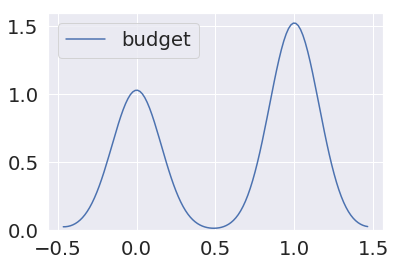

In [192]:
import seaborn as sns

sns.kdeplot(df.budget);

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


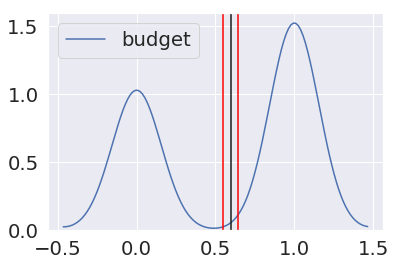

In [193]:
import matplotlib.pyplot as plt

ci = conf_in(df.budget)
sns.kdeplot(df.budget)
plt.axvline(x=ci[1], color='red')
plt.axvline(x=ci[2], color='red')
plt.axvline(x=ci[0], color='k');

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


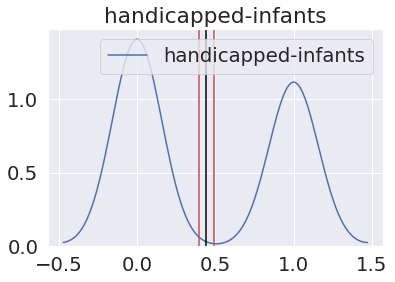

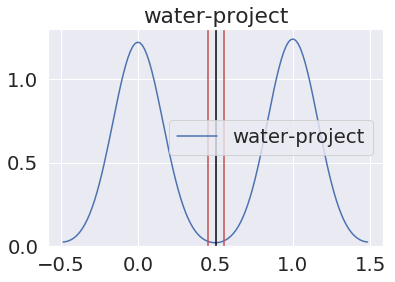

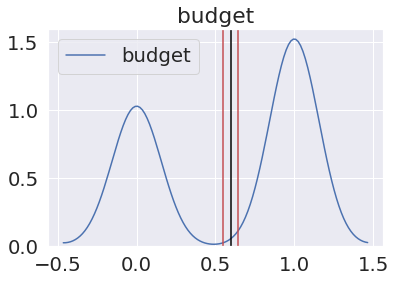

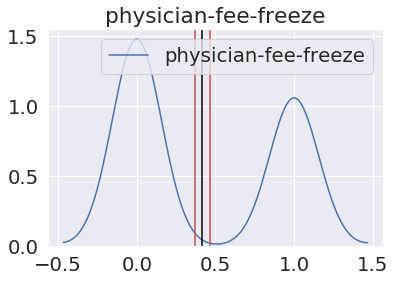

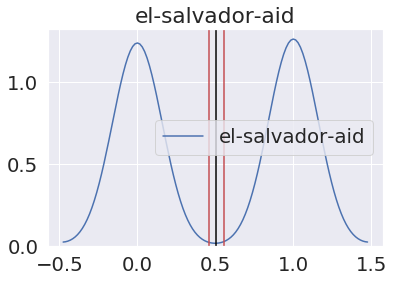

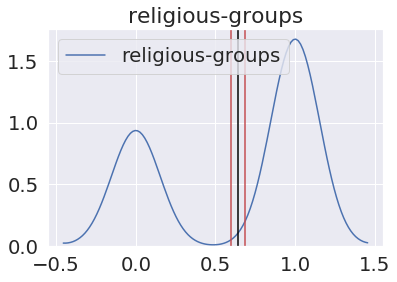

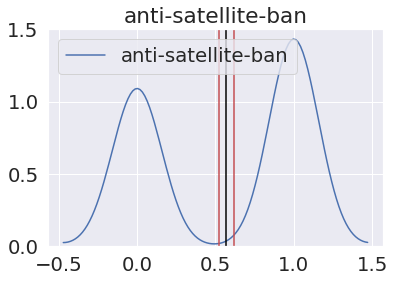

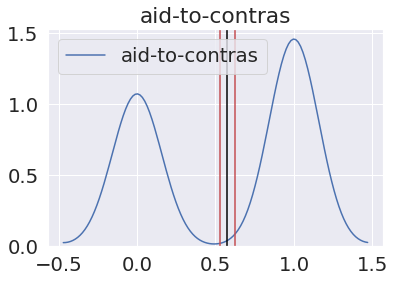

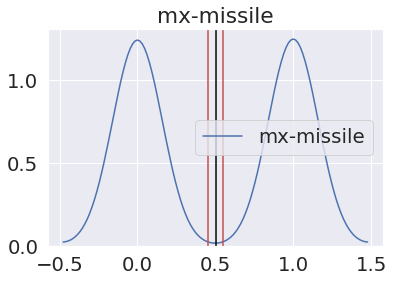

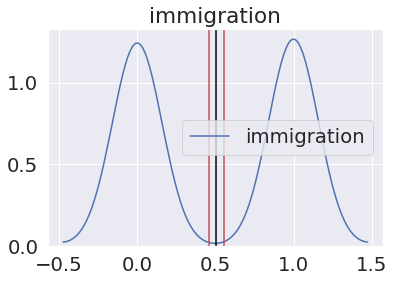

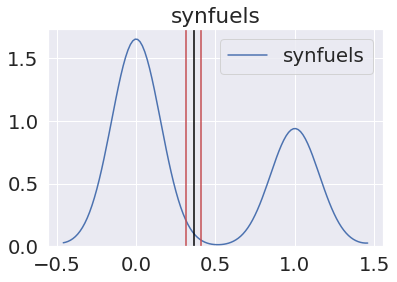

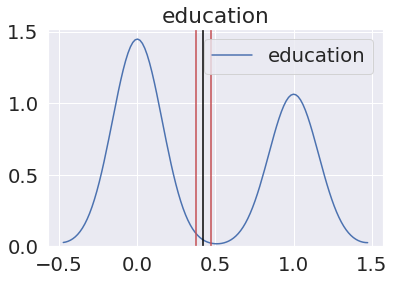

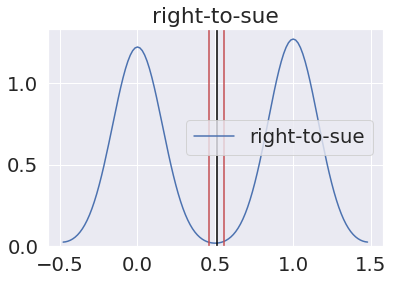

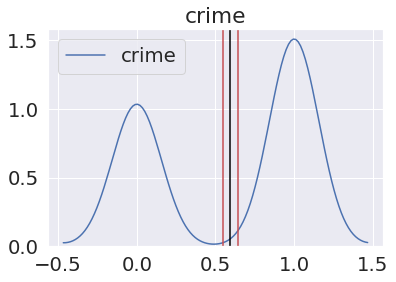

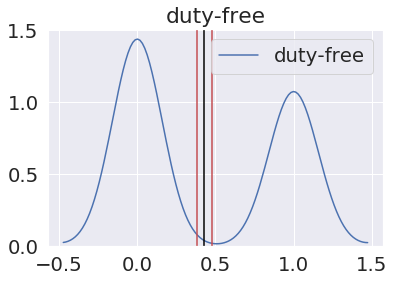

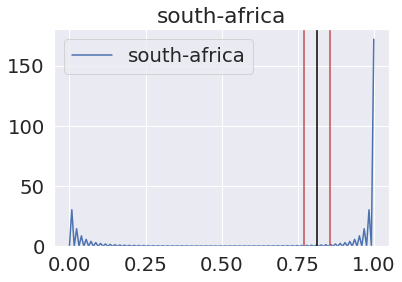

In [194]:
cols = df.columns[1:17].to_list()
for i in cols:
  sns.kdeplot(df[i])
  ci = conf_in(df[i])
  plt.axvline(x=ci[1], color='r')
  plt.axvline(x=ci[2], color='r')
  plt.axvline(x=ci[0], color='black')
  plt.title(i)
  plt.show()

In [195]:
cont_table1 = pd.crosstab(df.party, df['budget'], margins=True)
cont_table1

budget,0.0,1.0,All
party,,,
democrat,29,231,260
republican,142,22,164
All,171,253,424


In [196]:
total = cont_table1.loc['All','All']
total

424

In [197]:
con_row = cont_table1.iloc[0:2,2].values
con_row

array([260, 164])

In [198]:
con_col = cont_table1.iloc[2, 0:2].values
con_col

array([171, 253])

In [0]:
expected = []
for i in range(len(con_row)):
  expected_row = []
  for col in con_col:
    expected_val = (col*con_row[i])/total
    expected_row.append(expected_val)
  expected.append(expected_row)

In [200]:
expected

[[104.85849056603773, 155.14150943396226],
 [66.14150943396227, 97.85849056603773]]

In [201]:
observed = pd.crosstab(df.party, df.budget).values
observed

array([[ 29, 231],
       [142,  22]])

In [202]:
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

237.778255192867

In [203]:
cont_table = pd.crosstab(df.party, df['budget']).values
cont_table

array([[ 29, 231],
       [142,  22]])

In [204]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont_table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 234.65408769323486
P-value: 5.759792112623893e-53
Degrees of Freedom: 1
Expected: 
 [[104.85849057 155.14150943]
 [ 66.14150943  97.85849057]]


In [205]:
group = df.groupby('party').sum()
group

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
party,,,,,,,,,,,,,,,,
democrat,156.0,120.0,231.0,14.0,55.0,123.0,200.0,218.0,188.0,124.0,129.0,36.0,73.0,90.0,160.0,173.0
republican,31.0,75.0,22.0,163.0,157.0,149.0,39.0,24.0,19.0,92.0,21.0,135.0,136.0,158.0,14.0,96.0


In [0]:
gt = group.T

In [213]:
col = [i.replace('-',' ').title() for i in cols]
col


['Handicapped Infants',
 'Water Project',
 'Budget',
 'Physician Fee Freeze',
 'El Salvador Aid',
 'Religious Groups',
 'Anti Satellite Ban',
 'Aid To Contras',
 'Mx Missile',
 'Immigration',
 'Synfuels',
 'Education',
 'Right To Sue',
 'Crime',
 'Duty Free',
 'South Africa']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

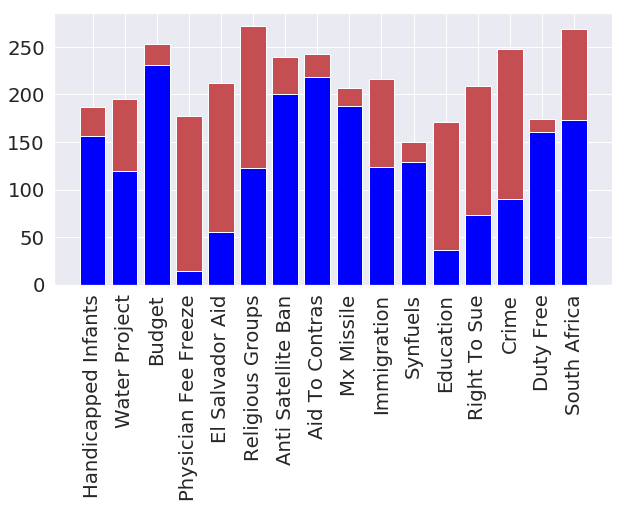

In [208]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
p1 = plt.bar(col, gt.democrat, color='blue')
p2 = plt.bar(col, gt.republican, bottom=gt.democrat, color='r')
plt.xticks(rotation=90)

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

In [209]:
gr = []
mids = []
mins = []
maxs = []
for i in cols:
  s = conf_in(df[i])
  mids.append(s[0])
  mins.append(s[2]-s[1])
  maxs.append(s[2])
  print(s)
mids = np.array(mids)




(0.44208037825059104, 0.39456046308364673, 0.48960029341753536)
(0.5038759689922481, 0.45384081311663604, 0.5539111248678601)
(0.5966981132075472, 0.5498151808536169, 0.6435810455614774)
(0.41745283018867924, 0.37032346810896244, 0.46458219226839603)
(0.5047619047619047, 0.4567501383795156, 0.5527736711442939)
(0.6415094339622641, 0.595678078934313, 0.6873407889902152)
(0.5676959619952494, 0.5201811192521687, 0.6152108047383301)
(0.5761904761904761, 0.5287372471168422, 0.6236437052641101)
(0.5012106537530266, 0.45278830107341983, 0.5496330064326335)
(0.5046728971962616, 0.45711551746571655, 0.5522302769268067)
(0.36231884057971014, 0.31582505683185436, 0.40881262432756593)
(0.42326732673267325, 0.37488391760148726, 0.47165073586385925)
(0.5097560975609756, 0.4611645412110688, 0.5583476539108825)
(0.5933014354066986, 0.546017195315226, 0.6405856754981711)
(0.4275184275184275, 0.3792525917327782, 0.4757842633040768)
(0.8126888217522659, 0.7704384213745765, 0.8549392221299552)


In [210]:
gr = pd.DataFrame({'mids':mids,'mins':mins,'maxs':maxs})
gr.head()

,mids,mins,maxs
0,0.442080,0.095040,0.489600
1,0.503876,0.100070,0.553911
2,0.596698,0.093766,0.643581
3,0.417453,0.094259,0.464582
4,0.504762,0.096024,0.552774


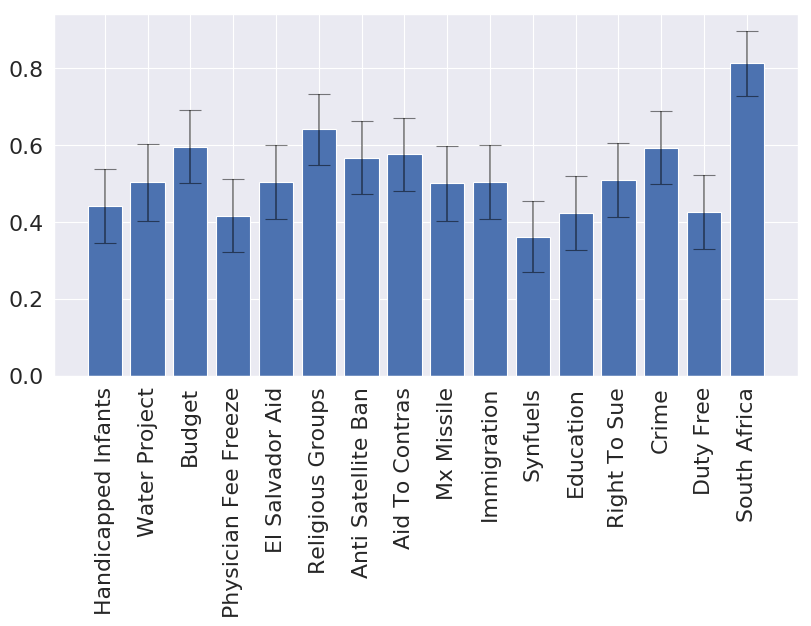

In [226]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.bar(col, mids)
plt.errorbar(col,mids,yerr=mins, alpha=0.5, ecolor='black', capsize=10, ls='none')
plt.xticks(rotation=90)



In [218]:
len(mins)

16